In [117]:
%matplotlib ipympl
# choose breast cancer dataset, which has two categories: malignant and benign
from sklearn.datasets import load_breast_cancer

# splitting tools, which will conduct the classic 80/20 data splitting strategy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# three target classifiers
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Part A: Data preparation

## 1. Load the dataset

In [63]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["target"])

# I used concatenation function to create pandas format dataset
# axis=1 means concatenating in expanding column way
df = pd.concat([X, y], axis = 1)
print(data.target_names)

['malignant' 'benign']


## 2. Display first few rows, summary statistics, and column descriptions

***The dataset has counter-convention naming rules.***  
***0 - Maligant***  
***1 - Benign***

### 2.1. Display first few rows

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2.2. Summary statistics

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### 2.3. Column descriptions

In [6]:
# sns.pairplot(df, hue="target")
description = data.DESCR
# Split by line breaks, filter out empty strings/whitespace lines
lines = description.strip().split('\n')
non_empty_lines = [line.strip() for line in lines if line.strip()]

# Join back together with double newlines for clear paragraphs
cleaner_text = '\n\n'.join(non_empty_lines)

print(cleaner_text)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset

--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:

- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three

worst/largest values) of these features were computed for each image,

resulting in 30 features.  For instance, field 0 is Mean Radius, field

10 is Radius SE, field 20 is Worst Radius.

- class:

- WDBC-Malignant

- WDBC-Benign

:Summ

### 2.4 Other EDA

target
1         0.627417
0         0.372583
Name: proportion, dtype: float64


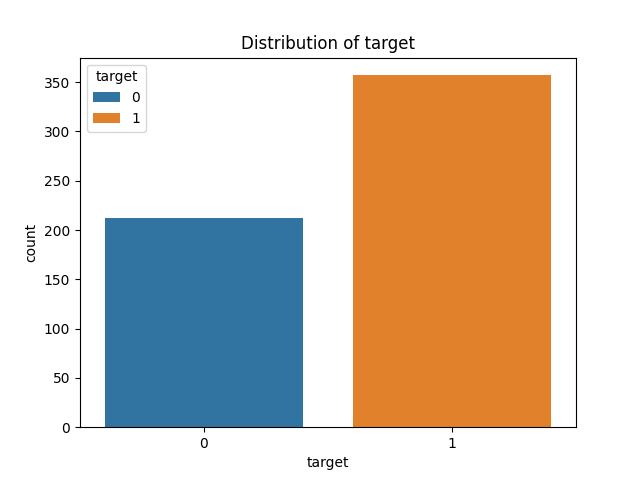

In [60]:
print(y.value_counts(normalize=True))
plt.figure()
sns.countplot(x='target', data=y, hue='target')
plt.title("Distribution of target")
plt.show()

## 3. Handling missing values (if any)

In [7]:
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum().sum())

    # Dropping empty value. axis=0 means drop the whole row, axis=1 means dropping the whole column. 
    # inplace=True means drop the row of data with empty unit without creating a new copy of data
    # df.dropna(axis=0, how="all")
    df.dropna(inplace = True)

    # Imputing empty value.
    # df.fillna()
else:
    print("No missing values.")

No missing values.


## 4. Split the dataset into train & test sets (80/20)

In [98]:
# Train-test split
# random_state is a randomazition seed to determine what shuffle sequence it is to split the dataset. 
# with the same random_state, same datasets will get same splitting result even for different environment. 42 is just a convention number, which is commonly used in this area.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Apply feature scaling (standardization)

***I choose not to standardize the dataset since these three classifiers are not distance sensitive.***

In [10]:
# Scale features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
print("No Standardization needed.")

No Standardization needed.


# Part B: Model implementation

## 1. Decision Tree Classifier

Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



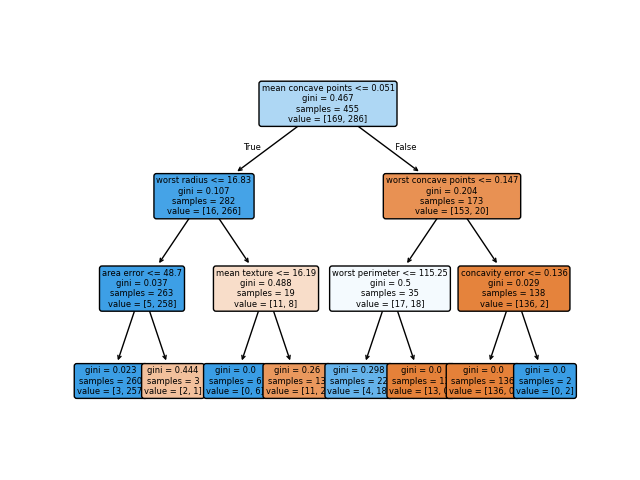

In [122]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

plt.figure()
plot_tree(dt, filled=True, feature_names=data.feature_names, fontsize=6, rounded=True)
plt.show()

## 2. Random Forest Classifier

### 2.1 Train, Tune, and Evaluate

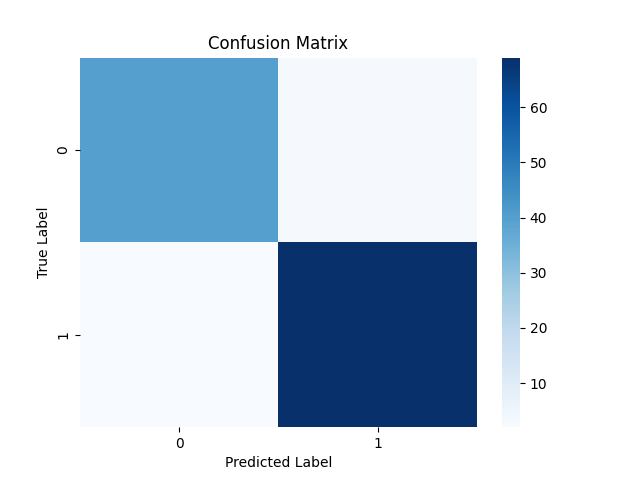

Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [124]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_rf), cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

### 2.2 Show feature importance plot

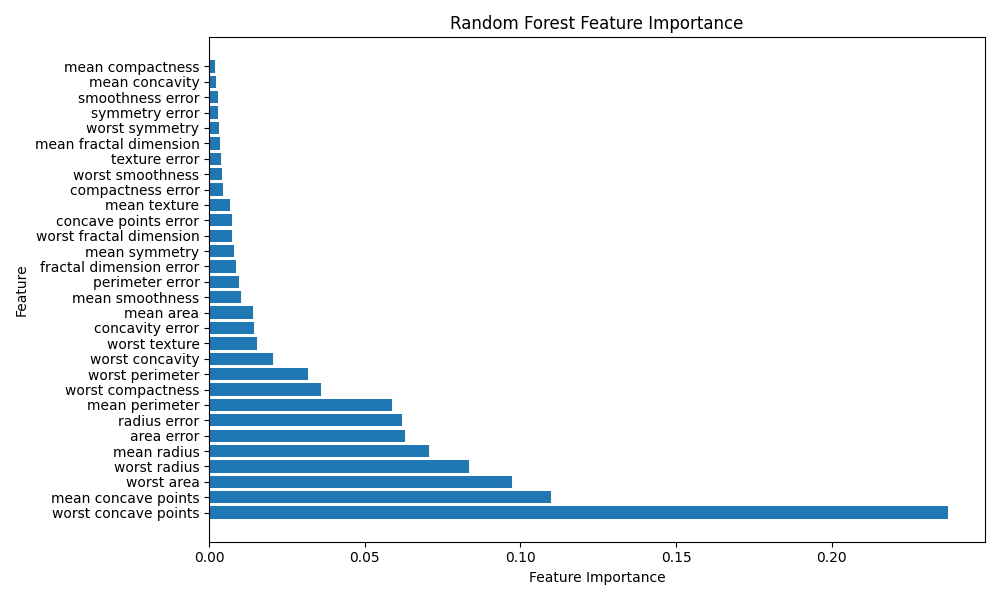

In [125]:
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

## 3. Naïve Bayes Classifier

In [121]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

